In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Import State Data

In [ ]:
# cleaned dataset path
path_il = '/work/State_Data/IL/illinois_sorted.csv'
path_tx = '/State_Data/TX/texas_education_data.csv'
path_ma = 'State_Data/MA/final_ma.csv'
path_ga = 'State_Data/GA/georgia_df.csv'

In [ ]:
illinois_data = pd.read_csv(path_il)

In [ ]:
ma_data = pd.read_csv(path_ma)
ma_data = ma_data.drop(columns=ma_data.columns[0])
ma_data

,district_code,avg_english_sat,avg_math_sat,avg_sat_total,avg_teacher_salary,expenditure_per_pupil,grad_rate,percent_enrolled_asian,percent_enrolled_black,percent_enrolled_female,percent_enrolled_latino,percent_enrolled_male,percent_enrolled_multiracial,percent_enrolled_other,percent_enrolled_white,state
0,4450000,527.0,512.0,1039.0,66422.0,16853.85,96.8,3.0,54.6,53.9,20.5,46.1,5.3,0.6,16.0,MA
1,10000,549.0,521.0,1070.0,92005.0,16143.23,92.5,2.7,5.2,49.0,12.3,50.9,2.1,0.6,77.1,MA
2,4120000,NaN,NaN,NaN,67505.0,21216.47,98.2,0.4,61.0,48.0,30.0,52.0,1.6,0.2,6.9,MA
3,6000000,655.0,681.0,1336.0,91268.0,18957.61,97.0,33.4,3.0,48.4,7.0,51.4,5.2,0.2,51.2,MA
4,4300000,604.0,634.0,1238.0,72386.0,16675.46,98.6,14.4,2.0,46.1,7.3,53.5,6.4,0.0,69.9,MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,3440000,638.0,651.0,1289.0,89442.0,16817.90,93.8,19.3,1.1,49.8,3.5,50.1,6.9,0.1,69.2,MA
294,3460000,554.0,555.0,1109.0,76884.0,16354.38,91.5,0.5,1.5,50.3,15.9,49.7,1.3,0.2,80.6,MA
295,3470000,541.0,530.0,1071.0,89168.0,20497.87,93.1,7.4,7.5,50.3,12.2,49.6,3.5,1.5,68.0,MA
296,3480000,453.0,443.0,896.0,93339.0,17315.90,87.7,6.0,16.9,48.9,44.7,51.1,4.3,0.2,27.9,MA


In [ ]:
georgia_data = pd.read_csv(path_ga)
georgia_data = georgia_data.drop(['district_name'], axis = 1)

In [ ]:
texas_data = pd.read_csv('State_Data/TX/texas_education_data.csv')
texas_data = texas_data.iloc[::2, :]

In [ ]:
texas_data['expenditure_per_pupil'] = texas_data['expenditure_per_pupil']/texas_data['student_total']

In [ ]:
texas_data = texas_data.drop('student_total', axis=1)

In [ ]:
vertical_concat = pd.concat([texas_data, georgia_data, ma_data, illinois_data], axis=0).reset_index(drop = True)

# Refine Data

## Data Sanity Checks

In [ ]:
vertical_concat.sort_values(by="grad_rate")

,district_code,avg_english_sat,avg_math_sat,avg_sat_total,avg_teacher_salary,expenditure_per_pupil,grad_rate,percent_enrolled_asian,percent_enrolled_black,percent_enrolled_female,percent_enrolled_latino,percent_enrolled_male,percent_enrolled_multiracial,percent_enrolled_other,percent_enrolled_white,state,student_total
49,138904,433.0,445.0,878.0,52457.692308,2.797019e+04,-1.0,0.0,0.0,42.666667,0.000000,57.333333,0.0,0.0,100.000000,TX,NaN
299,4240000,496.0,489.0,985.0,116644.000000,1.908590e+04,5.4,1.4,46.6,54.900000,46.600000,45.100000,0.9,0.9,3.700000,MA,NaN
410,35170000,NaN,NaN,NaN,55261.000000,1.804503e+04,24.6,0.9,4.5,40.400000,16.100000,54.700000,4.5,2.6,71.300000,MA,NaN
713,150169020250000,415.7,392.6,808.3,70785.000000,2.517849e+04,46.2,0.0,73.8,40.710000,22.200000,59.290000,0.0,0.0,0.000000,IL,124.000
319,4370000,NaN,NaN,NaN,60864.000000,2.431037e+04,58.1,0.0,67.2,49.300000,30.100000,50.700000,2.2,0.0,0.400000,MA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,185901,475.0,448.0,923.0,52762.125000,1.470888e+04,100.0,0.0,0.0,45.727483,100.000000,54.272517,0.0,0.0,0.000000,TX,NaN
906,400070420260000,541.3,519.3,1060.6,45960.000000,1.757163e+04,100.0,0.0,0.0,56.700000,0.000000,43.300000,0.0,0.0,92.500000,IL,109.705
101,195902,433.0,435.0,867.0,58970.533333,inf,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,NaN
77,174911,564.0,525.0,1089.0,49910.333333,1.152199e+04,100.0,0.0,0.0,49.148418,15.815085,50.851582,0.0,0.0,84.184915,TX,NaN


In [ ]:
# replace nan with -1
vertical_concat.replace(to_replace=-1,value=np.nan, inplace=True)
vertical_concat.sort_values(by="grad_rate")

,district_code,avg_english_sat,avg_math_sat,avg_sat_total,avg_teacher_salary,expenditure_per_pupil,grad_rate,percent_enrolled_asian,percent_enrolled_black,percent_enrolled_female,percent_enrolled_latino,percent_enrolled_male,percent_enrolled_multiracial,percent_enrolled_other,percent_enrolled_white,state,student_total
299,4240000,496.0,489.0,985.0,116644.000000,1.908590e+04,5.4,1.4,46.6,54.900000,46.600000,45.100000,0.9,0.9,3.700000,MA,NaN
410,35170000,NaN,NaN,NaN,55261.000000,1.804503e+04,24.6,0.9,4.5,40.400000,16.100000,54.700000,4.5,2.6,71.300000,MA,NaN
713,150169020250000,415.7,392.6,808.3,70785.000000,2.517849e+04,46.2,0.0,73.8,40.710000,22.200000,59.290000,0.0,0.0,0.000000,IL,124.000
319,4370000,NaN,NaN,NaN,60864.000000,2.431037e+04,58.1,0.0,67.2,49.300000,30.100000,50.700000,2.2,0.0,0.400000,MA,NaN
1032,601054280300000,373.9,363.6,737.5,86316.000000,9.304172e+04,60.6,0.0,68.6,0.000000,0.000000,100.000000,0.0,0.0,20.000000,IL,74.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,400070420260000,541.3,519.3,1060.6,45960.000000,1.757163e+04,100.0,0.0,0.0,56.700000,0.000000,43.300000,0.0,0.0,92.500000,IL,109.705
101,195902,433.0,435.0,867.0,58970.533333,inf,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,NaN
77,174911,564.0,525.0,1089.0,49910.333333,1.152199e+04,100.0,0.0,0.0,49.148418,15.815085,50.851582,0.0,0.0,84.184915,TX,NaN
49,138904,433.0,445.0,878.0,52457.692308,2.797019e+04,NaN,0.0,0.0,42.666667,0.000000,57.333333,0.0,0.0,100.000000,TX,NaN


In [ ]:
vertical_concat.sort_values(by="expenditure_per_pupil", ascending=False)

,district_code,avg_english_sat,avg_math_sat,avg_sat_total,avg_teacher_salary,expenditure_per_pupil,grad_rate,percent_enrolled_asian,percent_enrolled_black,percent_enrolled_female,percent_enrolled_latino,percent_enrolled_male,percent_enrolled_multiracial,percent_enrolled_other,percent_enrolled_white,state,student_total
132,228904,417.0,429.0,846.0,52909.214286,inf,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,NaN
101,195902,433.0,435.0,867.0,58970.533333,inf,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,NaN
220,667,504.0,473.0,977.0,66244.975652,2.897000e+05,83.456000,6.0,56.0,49.00,17.0,51.00,5.0,0.0,16.0,GA,NaN
210,656,542.0,536.0,1077.0,67396.382000,1.795259e+05,89.551667,4.0,24.0,47.00,9.0,53.00,6.0,0.0,57.0,GA,NaN
198,644,493.0,481.0,974.0,69375.150909,1.652610e+05,77.168333,0.0,94.0,49.00,4.0,51.00,2.0,0.0,1.0,GA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,631,552.0,527.0,1079.0,61032.676667,6.060514e+03,84.065000,1.0,81.0,50.00,14.0,50.00,2.0,0.0,1.0,GA,NaN
201,647,535.0,517.0,1052.0,54636.873333,6.023400e+03,87.037500,0.0,95.0,51.00,2.0,49.00,1.0,0.0,2.0,GA,NaN
205,651,496.0,440.0,936.0,63353.285000,5.367605e+03,91.856667,2.0,12.0,49.00,11.0,51.00,5.0,0.0,70.0,GA,NaN
173,616,518.0,490.0,1007.0,59631.595000,3.989377e+03,86.255000,1.0,14.0,46.00,4.0,54.00,2.0,0.0,78.0,GA,NaN


In [ ]:
# do the percent enrolled for race and gender add to 1 (or close to 1)?

race_features = ["percent_enrolled_white", "percent_enrolled_black", "percent_enrolled_latino", "percent_enrolled_asian", "percent_enrolled_multiracial", "percent_enrolled_other"]

vertical_concat[vertical_concat[race_features].sum(axis=1) < 95][["state"]+race_features]
# Georgia numbers were in decimal format

,state,percent_enrolled_white,percent_enrolled_black,percent_enrolled_latino,percent_enrolled_asian,percent_enrolled_multiracial,percent_enrolled_other
101,TX,NaN,NaN,NaN,NaN,NaN,NaN
132,TX,NaN,NaN,NaN,NaN,NaN,NaN
589,IL,94.5,0.0,0.0,0.0,0.0,0.0
652,IL,94.2,0.0,0.0,0.0,0.0,0.0
730,IL,87.3,0.0,7.3,0.0,0.0,0.0
778,IL,91.1,0.0,3.8,0.0,0.0,0.0
796,IL,94.1,0.0,0.0,0.0,0.0,0.0
797,IL,94.1,0.0,0.0,0.0,0.0,0.0
809,IL,91.9,0.0,0.0,0.0,0.0,0.0
862,IL,93.7,0.0,0.0,0.0,0.0,0.0


In [ ]:
# will drop these nan columns
gender_features = ["percent_enrolled_male", "percent_enrolled_female"]


vertical_concat[vertical_concat[gender_features].sum(axis=1) < 95][["state"]+gender_features]

,state,percent_enrolled_male,percent_enrolled_female
101,TX,NaN,NaN
132,TX,NaN,NaN


In [ ]:
# these are fine close enough to 100
vertical_concat[vertical_concat[gender_features].sum(axis=1) > 101]

,district_code,avg_english_sat,avg_math_sat,avg_sat_total,avg_teacher_salary,expenditure_per_pupil,grad_rate,percent_enrolled_asian,percent_enrolled_black,percent_enrolled_female,percent_enrolled_latino,percent_enrolled_male,percent_enrolled_multiracial,percent_enrolled_other,percent_enrolled_white,state,student_total
58,159901,500.0,491.0,991.0,61738.133333,11695.442041,93.8,0.0,0.0,49.275032,99.066272,52.061034,0.0,1.336066,0.933728,TX,NaN
95,187901,583.0,547.0,1130.0,62194.875000,17248.212500,97.4,0.0,0.0,65.000000,11.750000,61.250000,0.0,26.250000,88.250000,TX,NaN


# Visualization

In [ ]:
# Set the path to your shapefile (without file extension)
shapefile_path = '/work/geofiles/SCHOOLDISTRICTS_POLY.shp'

# Read the shapefile using GeoPandas
gdf = gpd.read_file(shapefile_path)
gdf.head(5)

,ORG4CODE,ORG8CODE,DISTRICT_N,DISTRICT_T,MEMBERLIST,TUITION,TUITION_GR,TUITION_TO,SUPERINTEN,START_GRAD,END_GRADE,SHAPE_AREA,SHAPE_LEN,geometry
0,0632,06320000,Chesterfield-Goshen,ReglElem,"Chesterfield, Goshen",N,None,None,Union 66,PK,06,1.267614e+08,54106.293089,"POLYGON ((88541.733 915372.935, 90512.453 9148..."
1,0635,06350000,Central Berkshire,ReglK12,"Becket, Cummington, Dalton, Hinsdale, Peru, Wa...",N,None,None,None,PK,12,5.553844e+08,139665.161811,"POLYGON ((69812.833 924426.005, 78513.633 9222..."
2,0640,06400000,Concord-Carlisle,ReglHS,"Concord, Carlisle",N,None,None,None,09,12,1.071116e+08,50368.975306,"POLYGON ((215044.322 914010.065, 215313.943 91..."
3,0645,06450000,Dennis-Yarmouth,ReglK12,"Dennis, Yarmouth",N,None,None,None,PK,12,1.218562e+08,96095.669377,"MULTIPOLYGON (((308662.873 823272.185, 308662...."
4,0650,06500000,Dighton-Rehoboth,ReglK12,"Dighton, Rehoboth",N,None,None,None,PK,12,1.806699e+08,65115.379652,"POLYGON ((223022.583 851359.695, 224212.852 85..."


In [ ]:
# Format the districts to 8 characters to match shapefile and check how many are in the shapefile
districts = ma_data['district_code'].apply('{0:0>8}'.format)
bools = gdf['ORG8CODE'].isin(districts)
print(f"Not in Shapefile: {list(bools).count(False)}  \nIn Shapefile: {list(bools).count(True)}")

Not in Shapefile: 71  
In Shapefile: 225


In [ ]:
# new data frame with just sat totals and formatted districts, and merge to geodataframe
ma_sats = ma_data[['avg_sat_total']]
ma_sats['districts'] = districts
ma_geo = gdf.merge(ma_sats, how='left', left_on='ORG8CODE', right_on='districts')

#count missing sat values
nan_count = ma_geo['avg_sat_total'].isna().sum()
nan_count

/tmp/ipykernel_44/1170792231.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma_sats['districts'] = districts


74

Text(0.5, 1.0, 'Average SAT total by District in MA')

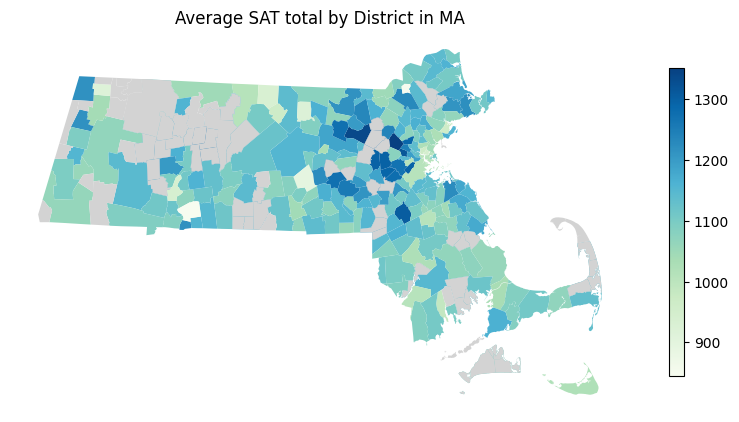

In [ ]:
# plot districts based on avg sat total
fig, ax = plt.subplots(figsize=(10, 8))
ma_geo.plot(column='avg_sat_total', cmap='GnBu', legend=True, ax=ax, legend_kwds={'shrink': 0.5}, missing_kwds={
        "color": "lightgrey",
        "label": "Missing values",
    })
ax.axis('off')
plt.title("Average SAT total by District in MA")

In [ ]:
vertical_concat.head()

,district_code,avg_english_sat,avg_math_sat,avg_sat_total,avg_teacher_salary,expenditure_per_pupil,grad_rate,percent_enrolled_asian,percent_enrolled_black,percent_enrolled_female,percent_enrolled_latino,percent_enrolled_male,percent_enrolled_multiracial,percent_enrolled_other,percent_enrolled_white,state,student_total
0,101803,572.0,550.0,1122.0,51966.000000,8569.276403,80.0,3.300330,10.231023,52.310231,31.765677,47.689769,4.455446,0.000000,50.247525,TX,NaN
1,101837,466.0,469.0,934.0,65810.875000,9595.436620,100.0,0.000000,18.309859,47.535211,65.140845,52.464789,0.000000,0.000000,16.549296,TX,NaN
2,101902,433.0,435.0,870.0,64013.375000,12285.709493,81.1,0.980663,21.576217,49.117728,74.117322,51.116460,1.154678,0.429345,1.975963,TX,NaN
3,101903,447.0,462.0,900.0,64781.875000,12615.805781,86.4,10.144389,26.871734,48.302251,59.214404,52.408549,0.329395,0.839587,3.311291,TX,NaN
4,101905,432.0,442.0,878.0,64677.133333,11852.828715,91.7,0.000000,9.382690,48.261474,84.465604,52.722799,0.887985,0.984273,5.263721,TX,NaN


In [ ]:
box_viz_df = vertical_concat[["avg_english_sat", "avg_math_sat", "state"]].melt(id_vars="state",value_vars=["avg_english_sat","avg_math_sat"])

Text(0.5, 1.0, 'SAT Components per District Broken Out by State')

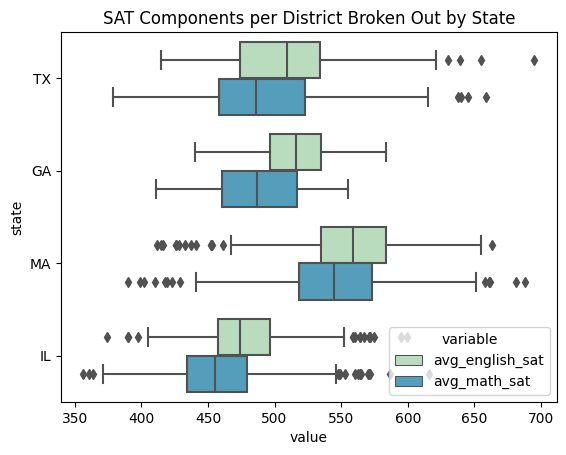

In [ ]:
ax = sns.boxplot(data=box_viz_df, x="value", y="state", hue="variable", palette="GnBu")
ax.set_title("SAT Components per District Broken Out by State")

In [ ]:
import plotly.express as px
# remove outliers for graphing
vertical_concat_mod = vertical_concat[(vertical_concat.expenditure_per_pupil <= 50000) & (vertical_concat.percent_enrolled_female <= 60)]

fig = px.parallel_coordinates(vertical_concat_mod, color="avg_sat_total",
                              dimensions=['avg_teacher_salary', 'expenditure_per_pupil', 'percent_enrolled_white','percent_enrolled_female'],
                              color_continuous_scale="GnBu", 
                              title="Selected District Feature Values and Associations with Average SAT Score (Extreme values removed)")
                              #color_continuous_midpoint=2)
fig.show()

In [ ]:
vertical_concat.head()

,district_code,avg_english_sat,avg_math_sat,avg_sat_total,avg_teacher_salary,expenditure_per_pupil,grad_rate,percent_enrolled_asian,percent_enrolled_black,percent_enrolled_female,percent_enrolled_latino,percent_enrolled_male,percent_enrolled_multiracial,percent_enrolled_other,percent_enrolled_white,state,student_total
0,101803,572.0,550.0,1122.0,51966.000000,8569.276403,80.0,3.300330,10.231023,52.310231,31.765677,47.689769,4.455446,0.000000,50.247525,TX,NaN
1,101837,466.0,469.0,934.0,65810.875000,9595.436620,100.0,0.000000,18.309859,47.535211,65.140845,52.464789,0.000000,0.000000,16.549296,TX,NaN
2,101902,433.0,435.0,870.0,64013.375000,12285.709493,81.1,0.980663,21.576217,49.117728,74.117322,51.116460,1.154678,0.429345,1.975963,TX,NaN
3,101903,447.0,462.0,900.0,64781.875000,12615.805781,86.4,10.144389,26.871734,48.302251,59.214404,52.408549,0.329395,0.839587,3.311291,TX,NaN
4,101905,432.0,442.0,878.0,64677.133333,11852.828715,91.7,0.000000,9.382690,48.261474,84.465604,52.722799,0.887985,0.984273,5.263721,TX,NaN


# Data Analysis and Model Creation

In [ ]:
# create a list to store names of target variables
target_variables = ["grad_rate", "avg_sat_total"]

In [ ]:
ml_df = vertical_concat.drop(columns=["avg_english_sat", "avg_math_sat", "district_code", "student_total"])

In [ ]:
ml_df.dtypes

avg_sat_total                   float64
avg_teacher_salary              float64
expenditure_per_pupil           float64
grad_rate                       float64
percent_enrolled_asian          float64
percent_enrolled_black          float64
percent_enrolled_female         float64
percent_enrolled_latino         float64
percent_enrolled_male           float64
percent_enrolled_multiracial    float64
percent_enrolled_other          float64
percent_enrolled_white          float64
state                            object
dtype: object

## Deal with missing data

In [ ]:
ml_df.isna().sum().sort_values(ascending=False)

avg_sat_total                   8
grad_rate                       2
percent_enrolled_asian          2
percent_enrolled_black          2
percent_enrolled_female         2
percent_enrolled_latino         2
percent_enrolled_male           2
percent_enrolled_multiracial    2
percent_enrolled_other          2
percent_enrolled_white          2
expenditure_per_pupil           1
avg_teacher_salary              0
state                           0
dtype: int64

In [ ]:
# will drop the missing data
ml_df.dropna(inplace=True)

### One-hot encoding

In [ ]:
ml_df = pd.get_dummies(ml_df, columns=["state"], prefix=["state"])

### Correlated Data

This section examines the correlation between feature variables. We would like our model coefficients to be interpretable so will drop features that lead to high correlation with other features.

<AxesSubplot: >

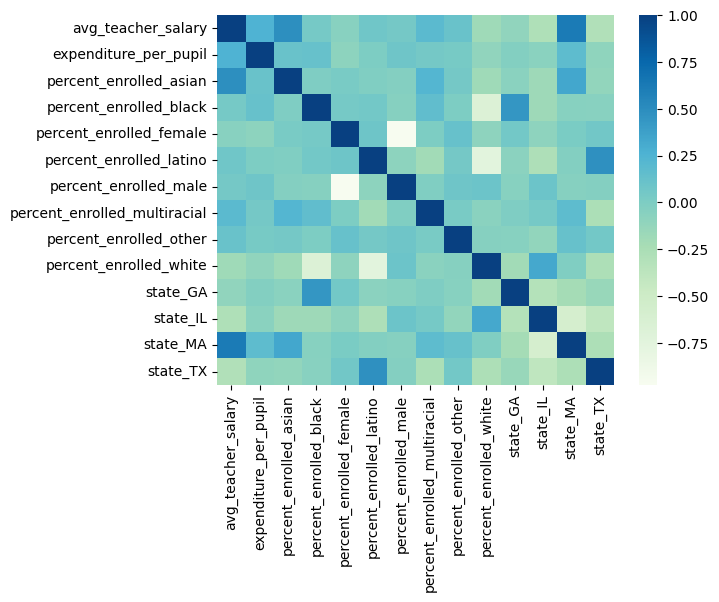

In [ ]:
# drop the target variables to only look at the features
sns.heatmap(ml_df.drop(columns=target_variables).corr(), cmap='GnBu')

Demographic categories, namely gender and race enrollment percentages, have highly correlated classifications (these categories add to 100% meaning one percentage is determined by the all the other percentages). Obviously, "percent_enrolled_male" and "percent_enrolled_female" are highly correlated with each other. We will drop "percent_enrolled_female" and make it a reference variable to "percent_enrolled_male". "percent_enrolled_white" is also hgihly correlated with other enrollment percentages by race. We will drop this variable. 

There also exists multicollinearities between the states given their dummy variables. We will drop "state_MA" and make this a reference variable to the other state dummy variables.

In [ ]:
ml_df_uncorr = ml_df.drop(columns=["percent_enrolled_male", "percent_enrolled_white", "state_MA"])

Let's reexamine the correlations to make sure there are no highly correlated features left.

<AxesSubplot: >

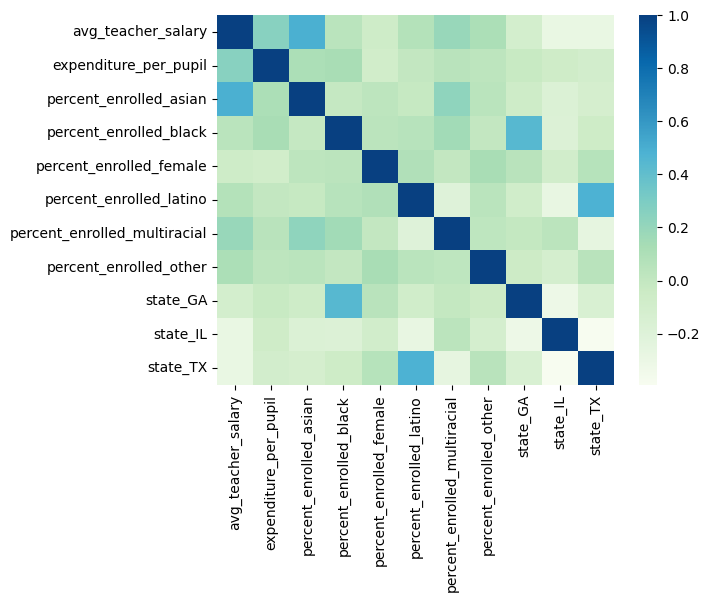

In [ ]:
sns.heatmap(ml_df_uncorr.drop(columns=target_variables).corr(), cmap='GnBu')

The correlations now seem tolerable

### Identifying Promising Variables through Mutual Information

We now will analyze our variables through the scope of mutual information. This technique is most useful for sorting through datasets with many features. While we do not have many features to start off with, mutual information still might be helpful to create parsimonious models.

In [ ]:
X_base = ml_df_uncorr.drop(columns=target_variables)
y_base = ml_df_uncorr["avg_sat_total"]

In [ ]:
X_base.dtypes

avg_teacher_salary              float64
expenditure_per_pupil           float64
percent_enrolled_asian          float64
percent_enrolled_black          float64
percent_enrolled_female         float64
percent_enrolled_latino         float64
percent_enrolled_multiracial    float64
percent_enrolled_other          float64
state_GA                          uint8
state_IL                          uint8
state_TX                          uint8
dtype: object

In [ ]:
# all discrete features are in int
discrete_features = X_base.dtypes == "uint8"

In [ ]:
# from Kaggle feature engineering tutorial 
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_base, y_base, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

avg_teacher_salary         0.223921
percent_enrolled_latino    0.182625
percent_enrolled_other     0.136125
percent_enrolled_female    0.019335
Name: MI Scores, dtype: float64

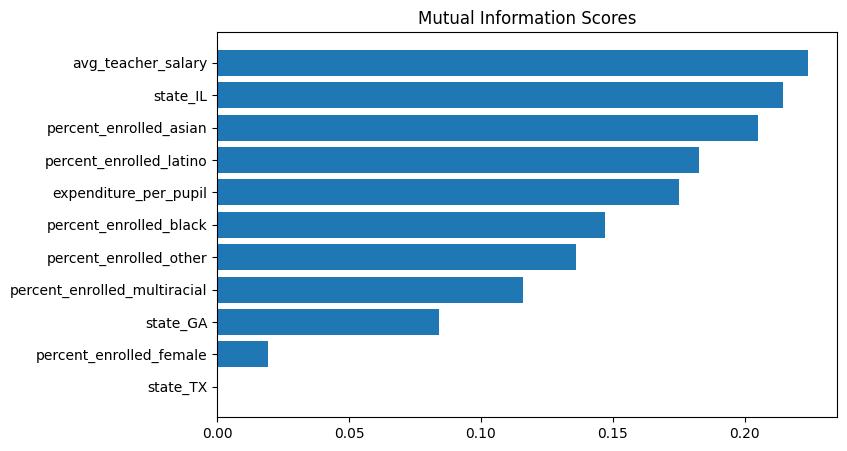

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

### Univariate and Bivariate Analysis (by variable) and Feature Engineering

Let's first create a baseline score with a simple linear regression model to see if out feature engineering has any benefit.

In [ ]:
from sklearn.model_selection import cross_val_score
# let's create functions to check performance and how a transformed dataframe inmpacts performance

def get_r2_cv_score(X, y, nfolds=5):
    """Returns cross validation r2 score for a linear model given design and target matrix
    
    Parameters:
        X (pandas.DataFrame): design matrix
        y (pandas.DataFrame): target matrix
        nfolds (int, optional, default=5): number of fold to  

    Returns:
        model_score (float): mean r_squared from cross validation
    
    """
    model = LinearRegression()
    model_score = cross_val_score(
        model, X, y, cv=nfolds, scoring="r2"
    )
    model_score = model_score.mean()

    return model_score

def check_transformation_impact(candidate_df, target_variable, baseline_score, suppress_output=False):
    """Function that checks if transformations increase the fit of the data on a linear model

    Parameters:
        candidate_df (pandas.DataFrame): dataframe with transformed variable
        target_variable (str): list of target variable to drop to obtain the design matrix
        transformed_variables (list): list of transformed variables to drop from the design matrix
        baseline_score (list): score to compare against
        supress_output (bool, optional): whether to print output or not

    Returns:
        r2_score (float): mean cross validation score
        r2_delta (float): performance of new model with transformations vs 
    """

    X_trans = candidate_df.drop(columns=target_variable)
    y_trans = candidate_df[target_variable]

    trans_model_score = get_r2_cv_score(X_trans, y_trans, nfolds=5)

    r2_delta = trans_model_score-baseline_score

    if suppress_output == False:
        print(f"r2 score after transform: {trans_model_score:.4}")
        print(f"r2 score delta vs baseline: {trans_model_score-baseline_score:.4}")

    return trans_model_score, r2_delta


In [ ]:
baseline_score = get_r2_cv_score(X_base, y_base)
print(f"r2 Baseline Score: {baseline_score:.4}")

r2 Baseline Score: 0.4403


We now go through each variable separately and try to mold the relationships into linear relationships for our linear model.

Let's check out the target variable first. We create a tree of data frames starting with engineering main, and only update engineering main with transformations if the transformation are valuable to performance.

In [ ]:
engineering_main_sat = ml_df_uncorr.drop(columns="grad_rate").copy()

Average SAT Total

In [ ]:
trans_cand_1 = engineering_main_sat.copy()

<AxesSubplot: xlabel='avg_sat_total', ylabel='Density'>

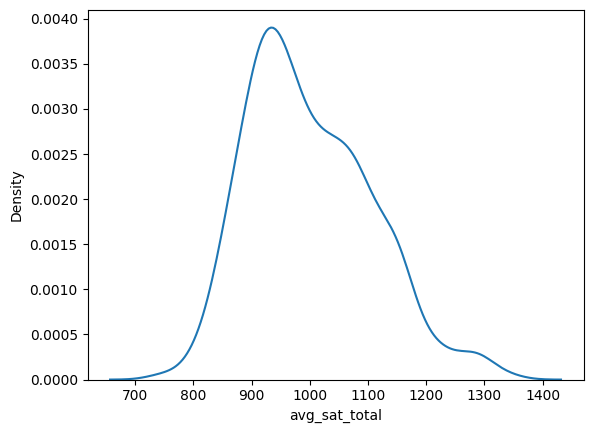

In [ ]:
sns.kdeplot(trans_cand_1["avg_sat_total"])

Let's see how a log transform changes the data.

In [ ]:
trans_cand_1["log_avg_sat_total"] =  np.log(trans_cand_1["avg_sat_total"])

<AxesSubplot: xlabel='log_avg_sat_total', ylabel='Density'>

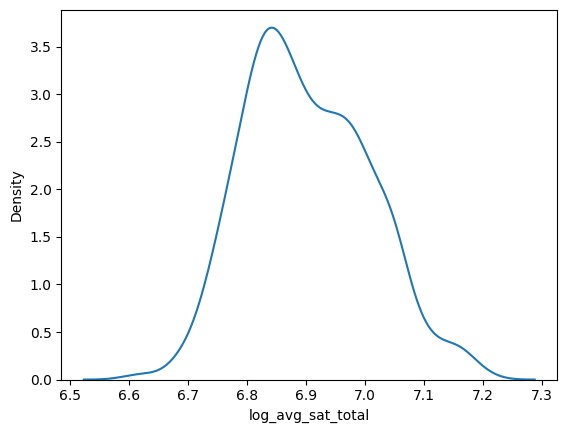

In [ ]:
sns.kdeplot(trans_cand_1["log_avg_sat_total"])

This looks a tiny bit more normalized.

In [ ]:
# does the model perform better at predicting log avg sat total
X_trans_1 = trans_cand_1.drop(columns=["avg_sat_total"]+["log_avg_sat_total"])
y_trans_1 = trans_cand_1["log_avg_sat_total"]

trans_mdl_1_score = get_r2_cv_score(X_trans_1, y_trans_1)
print(f"r2 score after first transform: {trans_mdl_1_score:.4}")
print(f"r2 score delta vs baseline: {trans_mdl_1_score-baseline_score:.4}")

r2 score after first transform: 0.4238
r2 score delta vs baseline: -0.01646


Putting the target variable on a log scale decreases performance. 

Average Teacher Salary

In [ ]:
trans_cand_2 = engineering_main_sat.copy()

<AxesSubplot: xlabel='avg_teacher_salary', ylabel='Density'>

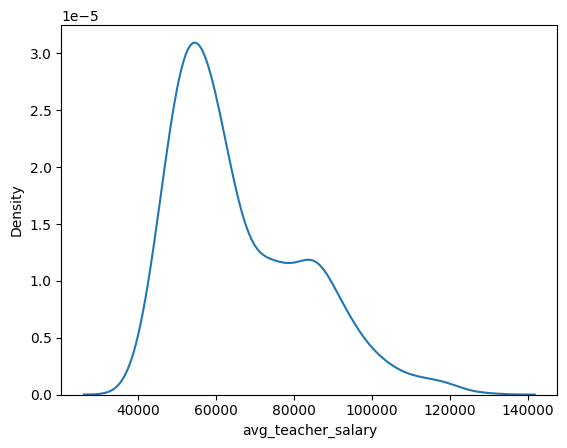

In [ ]:
sns.kdeplot(trans_cand_2["avg_teacher_salary"])

In [ ]:
trans_cand_2["log_avg_teacher_salary"] = np.log(trans_cand_2["avg_teacher_salary"])

<AxesSubplot: xlabel='log_avg_teacher_salary', ylabel='Density'>

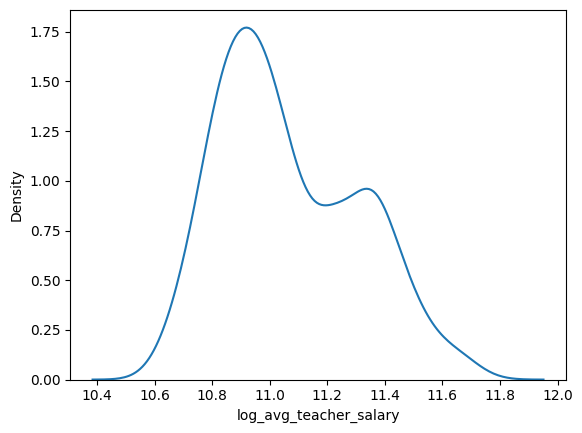

In [ ]:
sns.kdeplot(trans_cand_2["log_avg_teacher_salary"])

Log transformation has little effect on the distribution. It is still bimodal.

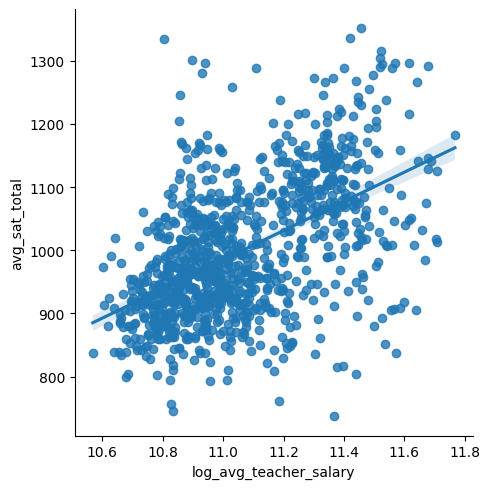

In [ ]:
sns.lmplot(data=trans_cand_2, x="log_avg_teacher_salary",y="avg_sat_total")

In [ ]:
check_transformation_impact(
    candidate_df=trans_cand_2, 
    target_variable="avg_sat_total", 
    baseline_score=baseline_score, 
    suppress_output=False)

r2 score after transform: 0.4422
r2 score delta vs baseline: 0.001924


(0.4422101648344242, 0.001924053313557772)

 The log transformation increased r squared by a little bit. We will not adopt the transformation because it is not worth the extra performance is not worth adding another variable.

**expenditure_per_pupil**

In [ ]:
trans_cand_3 = engineering_main_sat.copy()

<AxesSubplot: xlabel='expenditure_per_pupil', ylabel='Density'>

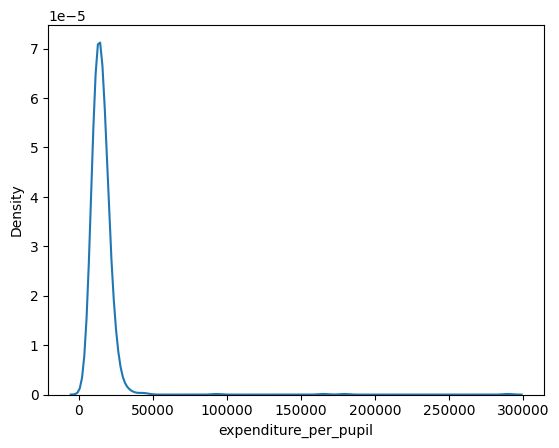

In [ ]:
sns.kdeplot(trans_cand_3["expenditure_per_pupil"])

In [ ]:
trans_cand_3["log_expenditure_per_pupil"] = np.log(trans_cand_3["expenditure_per_pupil"])

<AxesSubplot: xlabel='log_expenditure_per_pupil', ylabel='Density'>

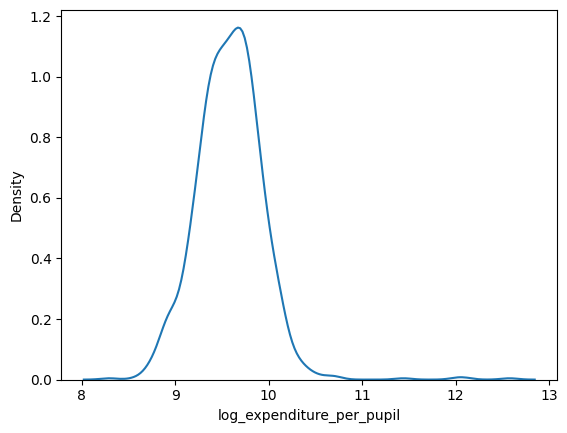

In [ ]:
sns.kdeplot(trans_cand_3["log_expenditure_per_pupil"])

Distribution seems more normal now.

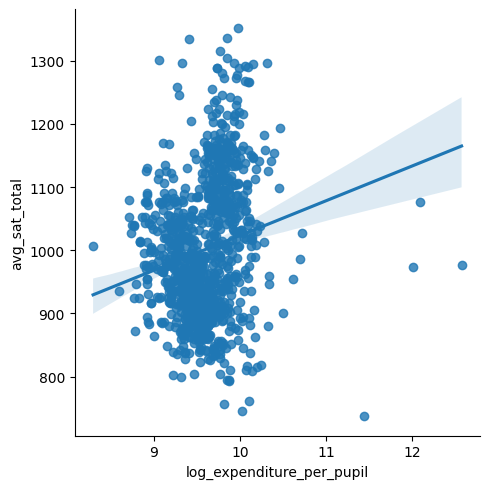

In [ ]:
sns.lmplot(data=trans_cand_3, x="log_expenditure_per_pupil",y="avg_sat_total")

In [ ]:
reference_cand, r2_delta = check_transformation_impact(
                    candidate_df=trans_cand_3, 
                    target_variable="avg_sat_total", 
                    baseline_score=baseline_score, 
                    suppress_output=False)

r2 score after transform: 0.4511
r2 score delta vs baseline: 0.01082


The transformation is beneficial. We will adopt the log of expenditure per pupil.

In [ ]:
reference_score = reference_cand
engineering_main_sat = trans_cand_3.copy()

In [ ]:
engineering_main_sat.columns

Index(['avg_sat_total', 'avg_teacher_salary', 'expenditure_per_pupil',
       'percent_enrolled_asian', 'percent_enrolled_black',
       'percent_enrolled_female', 'percent_enrolled_latino',
       'percent_enrolled_multiracial', 'percent_enrolled_other', 'state_GA',
       'state_IL', 'state_TX', 'log_expenditure_per_pupil'],
      dtype='object')

race features

In [ ]:
race_features

['percent_enrolled_white',
 'percent_enrolled_black',
 'percent_enrolled_latino',
 'percent_enrolled_asian',
 'percent_enrolled_multiracial',
 'percent_enrolled_other']

In [ ]:
trans_cand_4 = engineering_main_sat.copy()

<AxesSubplot: ylabel='Proportion'>

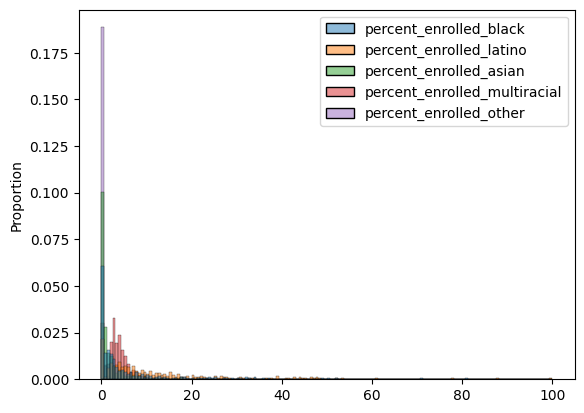

In [ ]:
sns.histplot(trans_cand_4[race_features[1:]], stat="proportion")

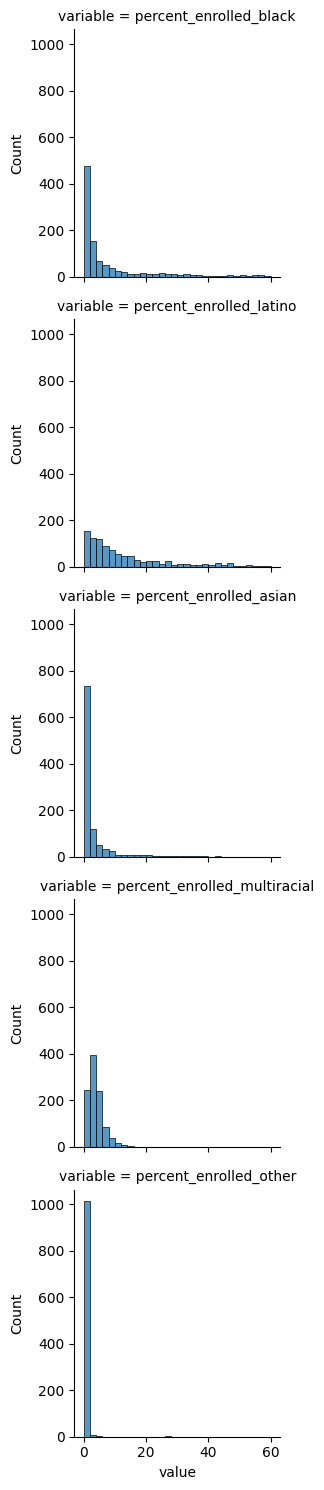

In [ ]:
g = sns.FacetGrid(pd.melt(trans_cand_4[race_features[1:]], value_vars=race_features[1:]), row="variable")
g.map_dataframe(sns.histplot, x="value", binwidth=2, binrange=(0, 60))

All of the race features seem to be right skewed, will try a log transform

<Figure size 640x480 with 0 Axes>

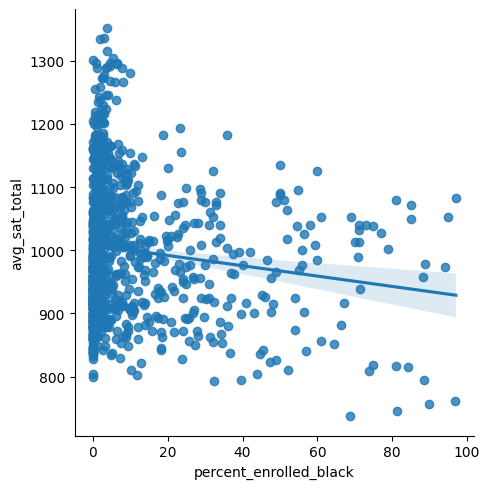

<Figure size 640x480 with 0 Axes>

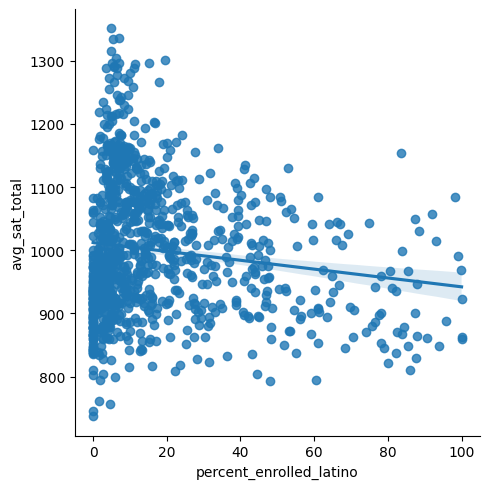

<Figure size 640x480 with 0 Axes>

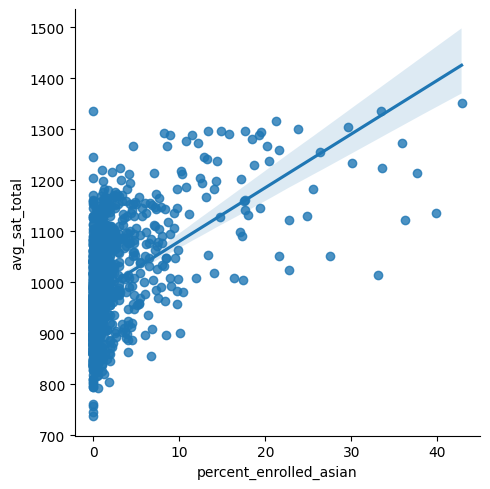

<Figure size 640x480 with 0 Axes>

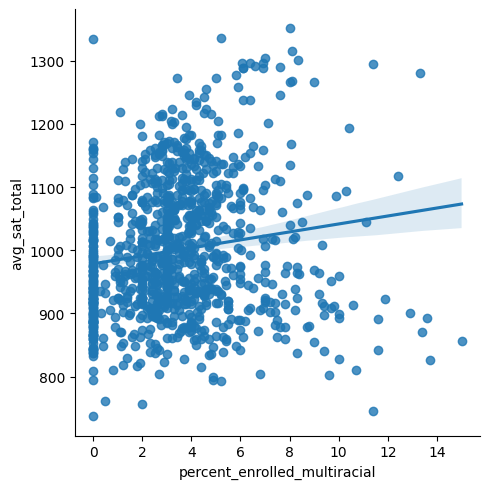

<Figure size 640x480 with 0 Axes>

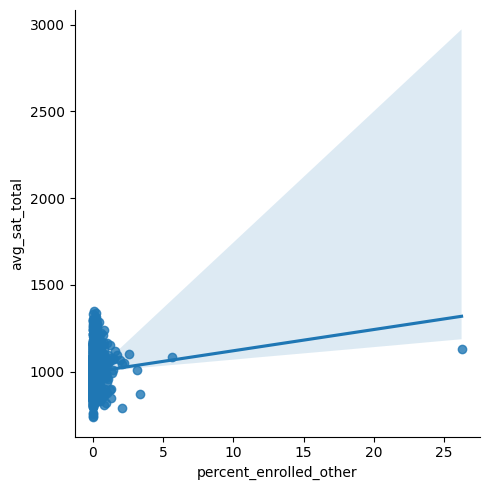

In [ ]:
for race in race_features[1:]:
    plt.figure()
    sns.lmplot(data=ml_df_uncorr, x=race, y="avg_sat_total")
    plt.show()

In [ ]:
trans_cand_4[[f"log_{feature_name}" for feature_name in race_features[1:]]]  = trans_cand_4[race_features[1:]].apply(np.log1p)

slightly less skew, but data is biased towards 0% meaning a log1p transform will keep many zeroes.

In [ ]:
reference_cand, r2_delta = check_transformation_impact(
                            candidate_df=trans_cand_4, 
                            target_variable="avg_sat_total", 
                            baseline_score=reference_score, 
                            suppress_output=False)

r2 score after transform: 0.4573
r2 score delta vs baseline: 0.006162


Log transforming the variables does not increase the score much.

### Pre-processing

We examine outliers and standardize our data in this section.

In [ ]:
engineering_main_sat.dtypes

avg_sat_total                   float64
avg_teacher_salary              float64
expenditure_per_pupil           float64
percent_enrolled_asian          float64
percent_enrolled_black          float64
percent_enrolled_female         float64
percent_enrolled_latino         float64
percent_enrolled_multiracial    float64
percent_enrolled_other          float64
state_GA                          uint8
state_IL                          uint8
state_TX                          uint8
log_expenditure_per_pupil       float64
dtype: object

In [ ]:
continuous_feature_names = [col for col in engineering_main_sat.columns if col not in ["state_GA", "state_IL", "state_TX", "avg_sat_total"]]
continuous_features_df_sat = engineering_main_sat[continuous_feature_names]

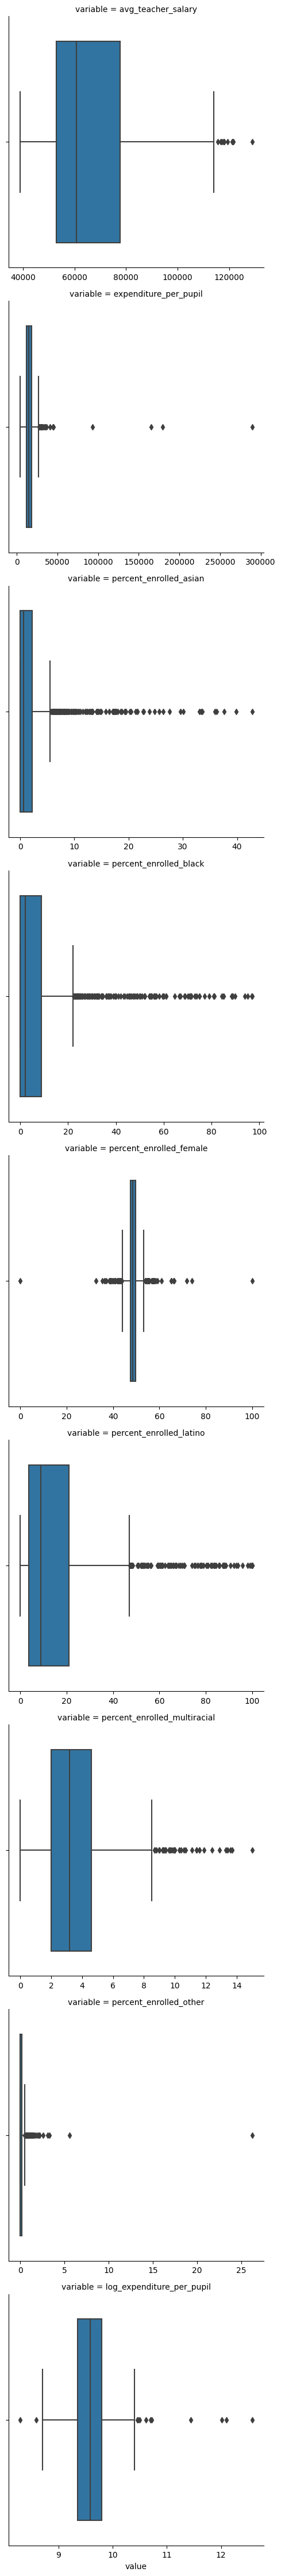

In [ ]:
sns.catplot(
    data=pd.melt(continuous_features_df_sat), x="value", row="variable", kind="box", sharex=False)

We must take into account that outliers may provide important data for the model. Many of the data points for the percentage features are outliers because there are so many 0% entries. When a field that is commonly zero has non-zero data, it may be important to maintain the value of this entry instead of truncating it or clipping it. We will test models using treated and untreated outliers. We will treat outliers after the train-test split to avoid data leakage.

In [ ]:
# lets write a class to winsorize multiple features at once

class Winsorizer:

    def __init__(self, min_quantile, max_quantile):
        self.min_quantile = min_quantile
        self.max_quantile = max_quantile

    def fit(self, X_train, column_array=None):
        if column_array is None:
            self.column_array = X_train.columns
        else:
            self.column_array = column_array
        
        # get quantiles for each 
        self.min_vals = np.percentile(X_train[self.column_array], self.min_quantile, axis=0)
        self.max_vals = np.percentile(X_train[self.column_array], self.max_quantile, axis=0)
    
    def transform(self, array):
        X_temp = array.copy()
        
        X_temp[self.column_array] = np.clip(X_temp[self.column_array], self.min_vals, self.max_vals)
        return X_temp

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# split data into design matrix and target variable
X = engineering_main_sat.copy()
y = X.pop("avg_sat_total")

# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100
)

In [ ]:
engineering_main_sat.shape

(1021, 13)

In [ ]:
from sklearn.preprocessing import StandardScaler

# regular scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# winsorize all continuous features
winsorizer = Winsorizer(1,99)
winsorizer.fit(X_train, column_array=continuous_feature_names)
X_train_wins = winsorizer.transform(X_train)
X_test_wins = winsorizer.transform(X_test)

# scale the winsorized data
win_scaler = StandardScaler()
X_train_wins_scaled = win_scaler.fit_transform(X_train_wins)
X_test_wins_scaled = win_scaler.transform(X_test_wins)

## Model Selection

We test out some different regression models to identify candidates to perform hyperparameter tuning on 

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

cand_models = [LinearRegression(), Lasso(), Ridge(), RandomForestRegressor(random_state=200)]

for cand_model in cand_models:

    model_score = cross_val_score(
        cand_model, X_train_scaled, y_train, cv=5, scoring="r2"
    )
    model_score_avg = model_score.mean()
    print(f"{cand_model} received an average r2 score of {model_score_avg}")

LinearRegression() received an average r2 score of 0.62899515431378
Lasso() received an average r2 score of 0.6425435096455314
Ridge() received an average r2 score of 0.6291686909323
RandomForestRegressor(random_state=200) received an average r2 score of 0.6660233034874228


In [ ]:
for cand_model in cand_models:

    model_score = cross_val_score(
        cand_model, X_train_wins_scaled, y_train, cv=5, scoring="r2"
    )
    model_score_avg = model_score.mean()
    print(f"{cand_model} received an average r2 score of {model_score_avg}")

LinearRegression() received an average r2 score of 0.6506301920591986
Lasso() received an average r2 score of 0.6500678884965738
Ridge() received an average r2 score of 0.650778951668776
RandomForestRegressor(random_state=200) received an average r2 score of 0.6670003875108472


use winsorized data models Ridge and RandomForestRegressor

In [ ]:
# Hyperparameter tuning grid 
from sklearn.model_selection import GridSearchCV

ridge_model = Ridge()

param_grid1 = {"alpha": [0.1, 1, 10, 100]}
grid_search1 = GridSearchCV(ridge_model, param_grid1, cv=5, scoring="r2")

grid_search1.fit(X_train_wins_scaled, y_train)

print("Best Parameters: ", grid_search1.best_params_)
print("Best ridge r2: ", grid_search1.best_score_)

best_ridge_model = grid_search1.best_estimator_

Best Parameters:  {'alpha': 10}
Best ridge r2:  0.651296065807941


In [ ]:
# for predictability
rfg_model = RandomForestRegressor()

param_grid2 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search2 = GridSearchCV(rfg_model, param_grid2, cv=5, scoring="r2")

grid_search2.fit(X_train_wins_scaled, y_train)

print("Best Parameters: ", grid_search2.best_params_)
print("Best random forrest regression  r2: ", grid_search2.best_score_)

best_rfg_model = grid_search2.best_estimator_

Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best random forrest regression  r2:  0.676397818510529


In [ ]:
ridge_best_score = best_ridge_model.score(X_test_wins_scaled, y_test)
rfg_best_score = best_rfg_model.score(X_test_wins_scaled, y_test)

print(f"ridge model r2 of {ridge_best_score} on the test set")
print(f"random forrest regressor model r2 of {rfg_best_score} on the test set")

ridge model r2 of 0.681113170515417 on the test set
random forrest regressor model r2 of 0.7314830505751866 on the test set


In [ ]:
coefs = pd.DataFrame({"variable": ["Intercept"] + list(X.columns), 
                      "coefficient": [best_ridge_model.intercept_] + list(best_ridge_model.coef_)})

In [ ]:
print(coefs.sort_values(by="coefficient", key=lambda x: abs(x), ascending=False))

                        variable  coefficient
0                      Intercept   999.234559
10                      state_IL   -58.486092
1             avg_teacher_salary    34.589201
6        percent_enrolled_latino   -32.461883
3         percent_enrolled_asian    28.564136
4         percent_enrolled_black   -22.687702
9                       state_GA   -10.172814
5        percent_enrolled_female     9.591571
2          expenditure_per_pupil    -6.417705
11                      state_TX     4.175990
7   percent_enrolled_multiracial     3.917769
8         percent_enrolled_other    -3.339087
12     log_expenditure_per_pupil    -2.747058


In [ ]:
def plot_coefficients(coefs):
    coefs = coefs.sort_values(ascending=True)
    width = np.arange(len(coefs))
    ticks = list(coefs.index)
    plt.barh(width, coefs)
    plt.yticks(width, ticks)
    plt.title("Coefficient Absolute Values (data standardized)")

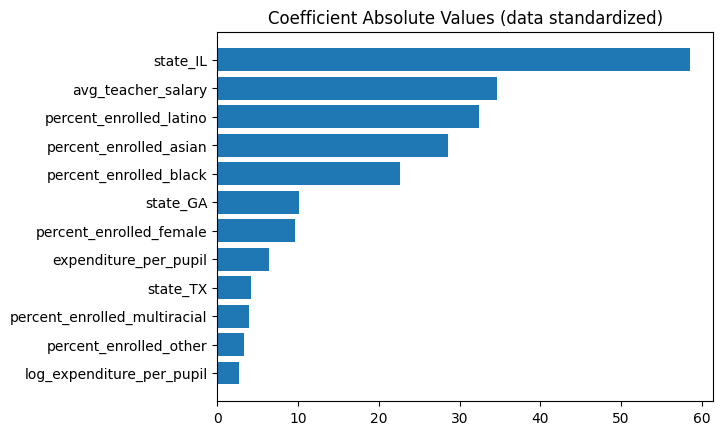

In [ ]:
coefs_ex_int = coefs[coefs.variable != "Intercept"].set_index("variable").iloc[:,0]


plot_coefficients(np.abs(coefs_ex_int))

## Ideas
- group aggregate feature for averages/median (like teacher salary), then compare avg to avg of avgs with multiple (ex. teachers in this dsitrict 1.6 times state median)
    - do you have to do tihs separately for training and test to prevent data leakage
    - or merge to the validation/test sets

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=52f0a1da-307f-465f-849a-299249bb4bce' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>